In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import matplotlib.pyplot as plt
import numpy as np
from persim import plot_diagrams

import warnings
warnings.filterwarnings('ignore')

In [3]:
from astropology.distance import bottleneck_distance, wasserstein_distance
from astropology.series import pd_from_distance_matrix
from astropology.series import sparse_matrix_serie


In [4]:
def add_noise(y: np.array, noise_amplitudes: np.array) -> np.array:

    n_points = y.size
    n_entries = noise_amplitudes.size
    
    y_noisy = np.empty((n_entries, n_points))

    for idx, y_noise in enumerate(y_noisy):
        y_noise[:] = noise_amplitudes[idx] * np.random.randn(n_points)

    return y_noisy

In [5]:
n_points = 2000
t = np.linspace(0, 5, n_points)
serie = np.cos(2*np.pi*t) + t
noise_amplitudes = np.logspace(-3, 0, 100)
noisy_series = add_noise(serie, noise_amplitudes)

In [6]:
# dm -> distance_matrix
w_distances = []
b_distances = []

dm_a = sparse_matrix_serie(serie)
pdgm_a = pd_from_distance_matrix(dm_a)

for noisy_serie in noisy_series:
    dm_b = sparse_matrix_serie(noisy_serie)
    pdgm_b = pd_from_distance_matrix(dm_b)
    w_distances.append(wasserstein_distance(pdgm_a, pdgm_b))
    b_distances.append(bottleneck_distance(pdgm_a, pdgm_b))

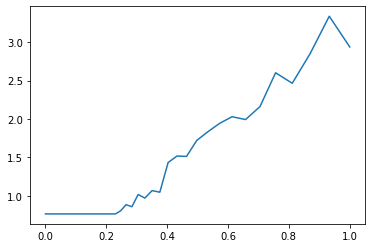

In [21]:
fig, ax = plt.subplots()
# ax.set_xscale('log')
# ax.set_yscale('log')
ax.plot(noise_amplitudes, b_distances)
# ax.plot(noise_amplitudes, w_distances)
